<a href="https://colab.research.google.com/github/nusrat-khan-13/html/blob/main/Spotify_Beyonce's_track_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'beyonce-track-attribute-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4594214%2F7837467%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T095336Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D725f2c0abf97c0de5a06249cbe6ab51e66abcc8d043955246b88609df2514c9f2320d96fc1a039d06694d70e5a2d7150a1d0d4b02b3388b76e1bdbf1f83016ba97303d2ba64e5bca7941833110beb19c4c48251c295c9ea0d341394924c24ad07323a1328b518b7c27c6ccc141ac5645a5972337548a7bac0a22e19cd3d12d10e6fc1bd437915cb800f67eb35643378483e51bfb236549db54e6ca4bcf386a8ae5e5b53a5ab1d84347395ac2a77ca90cff8ca289c78b2560c646e250f214e60ecce4987aa5b0fcfab69560b578134e2953212d08748114068d5b6f9683bbf5d57478a1971774b49da629a12b02fe8684e2647da15d234317040157c8686b110e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/kaggle/input/beyonce-track-attribute-data/beyonce_tracks.csv')
print(df)

                               artist_name  \
0                                  Beyoncé   
1                                  Beyoncé   
2                                  Beyoncé   
3                                  Beyoncé   
4                            Beyoncé, BEAM   
..                                     ...   
331                         Beyoncé, JAY-Z   
332                                Beyoncé   
333  Beyoncé, Victor Calderone, Mac Quayle   
334                          Beyoncé, Azza   
335                Beyoncé, Maurice Joshua   

                              track_name                       album_name  \
0                          I'M THAT GIRL                      RENAISSANCE   
1                                   COZY                      RENAISSANCE   
2                        ALIEN SUPERSTAR                      RENAISSANCE   
3                                CUFF IT                      RENAISSANCE   
4                    ENERGY (feat. Beam)                      

In [ ]:
df.head()

,artist_name,track_name,album_name,is_explicit,genres,release_date,track_id,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
0,Beyoncé,I'M THAT GIRL,RENAISSANCE,True,"pop, r&b",2022-07-29,1MpCaOeUWhox2Fgigbe1cL,0.554,0.136,0.535,-8.959,0.061600,0.000013,0.1240,0.1860,5,105.865,0,208014,4
1,Beyoncé,COZY,RENAISSANCE,True,"pop, r&b",2022-07-29,0mKGwFMHzTprtS2vpR3b6s,0.556,0.367,0.630,-8.150,0.000828,0.004680,0.1550,0.1020,7,149.147,1,210372,5
2,Beyoncé,ALIEN SUPERSTAR,RENAISSANCE,True,"pop, r&b",2022-07-29,1Hohk6AufHZOrrhMXZppax,0.545,0.464,0.641,-6.398,0.004530,0.000066,0.1710,0.0998,10,121.892,0,215460,4
3,Beyoncé,CUFF IT,RENAISSANCE,True,"pop, r&b",2022-07-29,1xzi1Jcr7mEi9K2RfzLOqS,0.780,0.642,0.689,-5.668,0.036800,0.000010,0.0698,0.1410,7,115.042,1,225389,4
4,"Beyoncé, BEAM",ENERGY (feat. Beam),RENAISSANCE,False,"pop, r&b",2022-07-29,0314PeD1sQNonfVWix3B2K,0.903,0.587,0.519,-9.151,0.281000,0.000106,0.1550,0.2600,1,114.991,1,116727,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       336 non-null    object 
 1   track_name        336 non-null    object 
 2   album_name        336 non-null    object 
 3   is_explicit       336 non-null    bool   
 4   genres            336 non-null    object 
 5   release_date      336 non-null    object 
 6   track_id          336 non-null    object 
 7   danceability      336 non-null    float64
 8   valence           336 non-null    float64
 9   energy            336 non-null    float64
 10  loudness          336 non-null    float64
 11  acousticness      336 non-null    float64
 12  instrumentalness  336 non-null    float64
 13  liveness          336 non-null    float64
 14  speechiness       336 non-null    float64
 15  key               336 non-null    int64  
 16  tempo             336 non-null    float64
 1

In [ ]:
df.describe()

,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.612640,0.490362,0.682492,-7.289720,0.138767,0.079687,0.305424,0.168143,5.181548,121.615961,0.651786,250289.229167,3.922619
std,0.155603,0.233648,0.189090,2.854806,0.219504,0.209146,0.265685,0.150844,3.568488,29.594229,0.477115,98478.940431,0.408814
min,0.143000,0.038800,0.045200,-27.432000,0.000066,0.000000,0.016200,0.027100,0.000000,66.930000,0.000000,16373.000000,1.000000
25%,0.508750,0.323000,0.557750,-8.451000,0.005295,0.000000,0.097200,0.053650,1.000000,97.076500,0.000000,200813.000000,4.000000
50%,0.635000,0.489500,0.715000,-6.750500,0.037200,0.000020,0.201000,0.106500,6.000000,123.015000,1.000000,228933.000000,4.000000
75%,0.725250,0.651000,0.821750,-5.446750,0.158000,0.005510,0.392750,0.254750,8.000000,136.039000,1.000000,278884.750000,4.000000
max,0.925000,0.971000,0.993000,-2.706000,0.994000,0.937000,0.983000,0.940000,11.000000,216.788000,1.000000,597520.000000,5.000000


In [ ]:
print(df.isnull().sum())

artist_name         0
track_name          0
album_name          0
is_explicit         0
genres              0
release_date        0
track_id            0
danceability        0
valence             0
energy              0
loudness            0
acousticness        0
instrumentalness    0
liveness            0
speechiness         0
key                 0
tempo               0
mode                0
duration_ms         0
time_signature      0
dtype: int64


In [ ]:
duplicate_rows=df.duplicated().sum()
print(f'Numbers of duplicate rows: {duplicate_rows}')

Numbers of duplicate rows: 0


In [ ]:
duplicate_tracks=df['track_name'].duplicated(keep=False)
print(f'Number of matching track names: {duplicate_tracks.sum()}')

Number of matching track names: 84


In [ ]:
if duplicate_tracks.sum()>0:
    duplicate_tracks_df=df[duplicate_tracks].sort_values(by='track_name')
    print(duplicate_tracks_df[['artist_name','track_name','album_name','release_date']])

                           artist_name               track_name  \
30   Beyoncé, Shatta Wale, Major Lazer                  ALREADY   
20   Beyoncé, Shatta Wale, Major Lazer                  ALREADY   
272       Beyoncé, Alejandro Fernández              Amor Gitano   
185       Beyoncé, Alejandro Fernández              Amor Gitano   
16                             Beyoncé                   BIGGER   
..                                 ...                      ...   
194                            Beyoncé                Suga Mama   
242                            Beyoncé             Sweet Dreams   
164                            Beyoncé             Sweet Dreams   
174                     Beyoncé, JAY-Z  Upgrade U (feat. Jay-Z)   
195                     Beyoncé, JAY-Z  Upgrade U (feat. Jay-Z)   

                                   album_name release_date  
30                    The Lion King: The Gift   2019-07-19  
20   The Lion King: The Gift [Deluxe Edition]   2020-07-31  
272         

In [ ]:
duplicate_tracks_df

,artist_name,track_name,album_name,is_explicit,genres,release_date,track_id,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
30,"Beyoncé, Shatta Wale, Major Lazer",ALREADY,The Lion King: The Gift,False,"pop, r&b",2019-07-19,6tgEc2O1uFHcZDKPoo6PC8,0.647,0.548,0.732,-5.846,0.08460,0.000000,0.5970,0.0891,2,67.295,1,222529,3
20,"Beyoncé, Shatta Wale, Major Lazer",ALREADY,The Lion King: The Gift [Deluxe Edition],False,"pop, r&b",2020-07-31,1TSinFFcDJJzR6ErO81Y3c,0.671,0.543,0.755,-5.831,0.08760,0.000000,0.4290,0.0683,2,67.332,0,223422,3
272,"Beyoncé, Alejandro Fernández",Amor Gitano,Irreemplazable,False,"pop, r&b",2007-08-27,2N1D0rf5uu3kYLxgEXWB8E,0.390,0.627,0.758,-5.687,0.45700,0.000000,0.1880,0.3220,4,168.128,0,228413,4
185,"Beyoncé, Alejandro Fernández",Amor Gitano,B'Day Deluxe Edition,False,"pop, r&b",2007-05-29,1Kd5Qj9kicqjCw1BjWRzH0,0.491,0.596,0.745,-5.631,0.47300,0.000000,0.2390,0.2540,4,167.875,0,228413,4
16,Beyoncé,BIGGER,The Lion King: The Gift [Deluxe Edition],False,"pop, r&b",2020-07-31,0gdOcxvPU37ADE7vPkgQsv,0.509,0.181,0.360,-8.200,0.63300,0.000000,0.1300,0.0361,5,129.624,0,226361,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Beyoncé,Suga Mama,B'Day,False,"pop, r&b",2006-09-04,7hrrhtzmyTcULmNlYlcxJO,0.682,0.615,0.939,-4.054,0.22600,0.000315,0.3460,0.2840,9,93.810,0,204813,4
242,Beyoncé,Sweet Dreams,Ego/Sweet Dreams Singles & Dance Mixes,False,"pop, r&b",2009-07-21,3BwDtDoQJjo8lsSMTMuUHg,0.693,0.755,0.819,-6.001,0.10300,0.000016,0.0637,0.1010,1,121.968,1,209213,4
164,Beyoncé,Sweet Dreams,I AM...SASHA FIERCE,False,"pop, r&b",2008-11-14,1FKxKGONukVFXWVJxAKmlz,0.694,0.788,0.825,-5.986,0.08950,0.000019,0.0618,0.1110,1,121.949,1,208067,4
174,"Beyoncé, JAY-Z",Upgrade U (feat. Jay-Z),B'Day Deluxe Edition,False,"pop, r&b",2007-05-29,0GLUBbX4daHJkT3RQHEOia,0.593,0.483,0.680,-5.556,0.00182,0.000048,0.3100,0.3350,7,84.547,1,273053,4


In [ ]:
# Convert release_date to datetime format
df['release_date']=pd.to_datetime(df['release_date'])

In [ ]:
# Convert 'key', 'mode', and 'time_signature' to categorical variables
df['key']=df['key'].astype('category')
df['mode']=df['mode'].astype('category')
df['time_signature']=df['time_signature'].astype('category')
print(df.dtypes)



artist_name                 object
track_name                  object
album_name                  object
is_explicit                   bool
genres                      object
release_date        datetime64[ns]
track_id                    object
danceability               float64
valence                    float64
energy                     float64
loudness                   float64
acousticness               float64
instrumentalness           float64
liveness                   float64
speechiness                float64
key                       category
tempo                      float64
mode                      category
duration_ms                  int64
time_signature            category
dtype: object


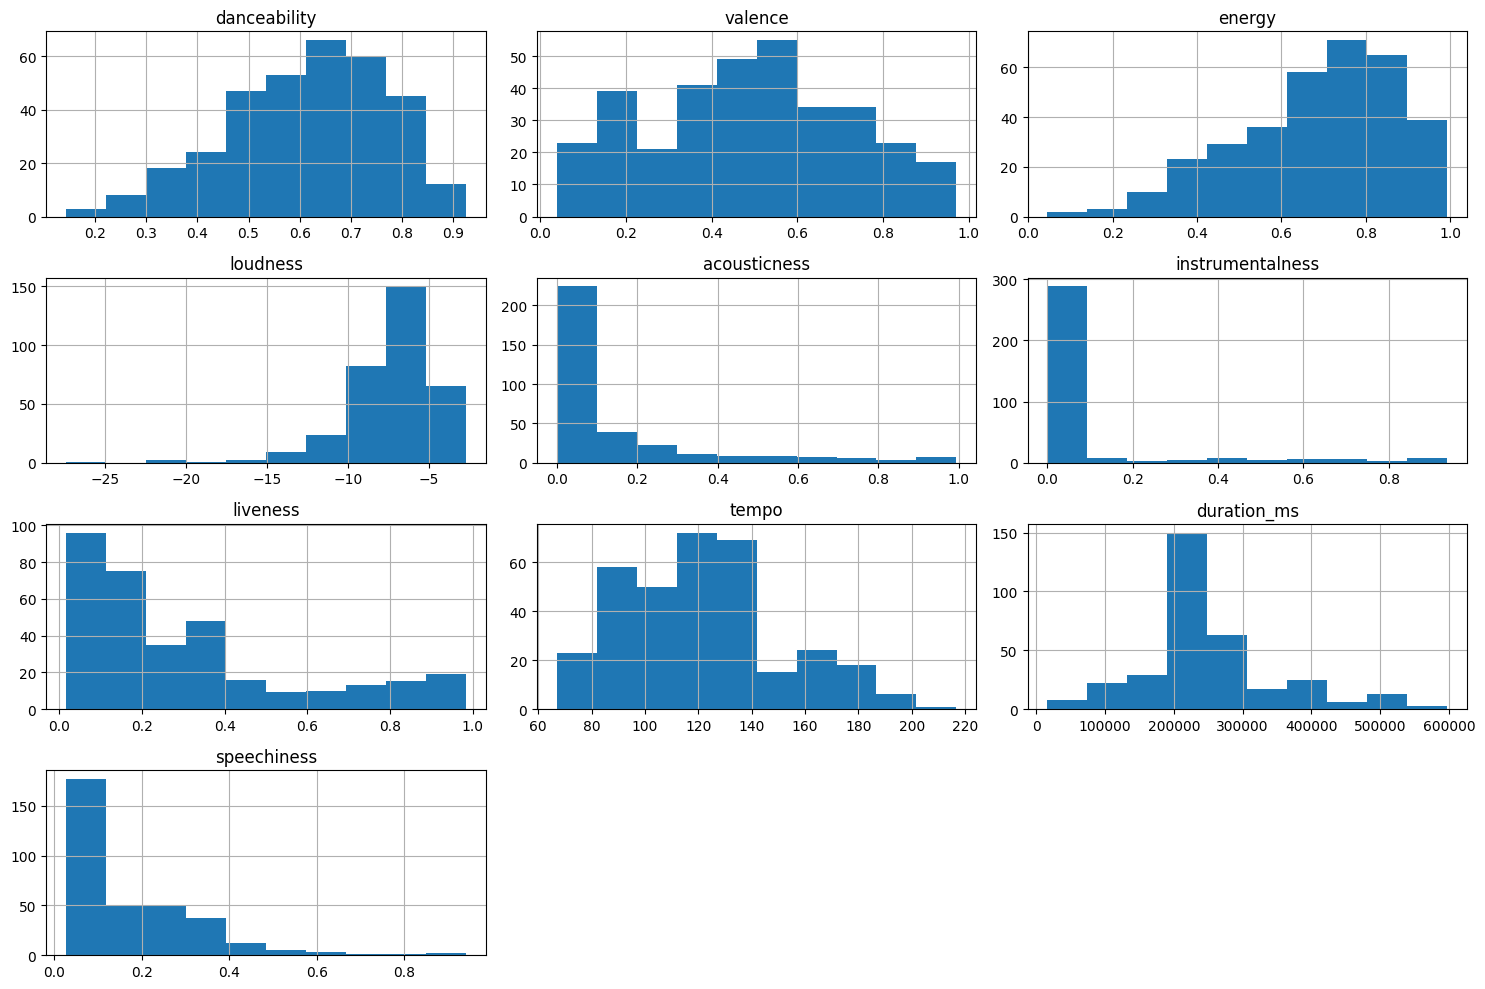

In [ ]:
# Select Numerical Columns to plot
num_cols=['danceability','valence','energy','loudness','acousticness','instrumentalness','liveness','tempo','mode','duration_ms','time_signature','speechiness']

#plot histograms
df[num_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

In [ ]:
# Set the colorblind palette
sns.set_palette("colorblind")

    year    energy
0   2002  0.750000
1   2003  0.482482
2   2004  0.471500
3   2006  0.773878
4   2007  0.754348
5   2008  0.545882
6   2009  0.749465
7   2010  0.772269
8   2011  0.709778
9   2014  0.553550
10  2016  0.486000
11  2019  0.697809
12  2020  0.534800
13  2022  0.710650
14  2023  0.604833
15  2024  0.515500


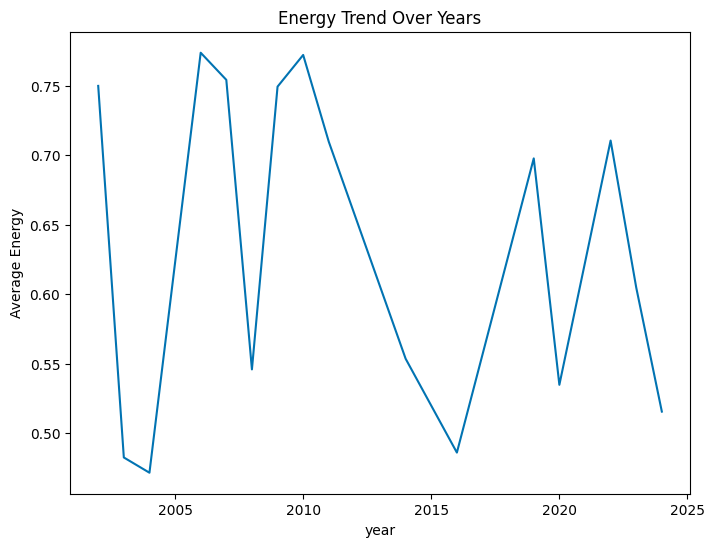

In [ ]:
# Group by release year
df['year']=df['release_date'].dt.year
energy_trend=df.groupby('year')['energy'].mean().reset_index()
print(energy_trend)

#plot
plt.figure(figsize=(8,6))
sns.lineplot(x='year',y='energy',data=energy_trend)
plt.title('Energy Trend Over Years')
plt.xlabel('year')
plt.ylabel('Average Energy')
plt.show()


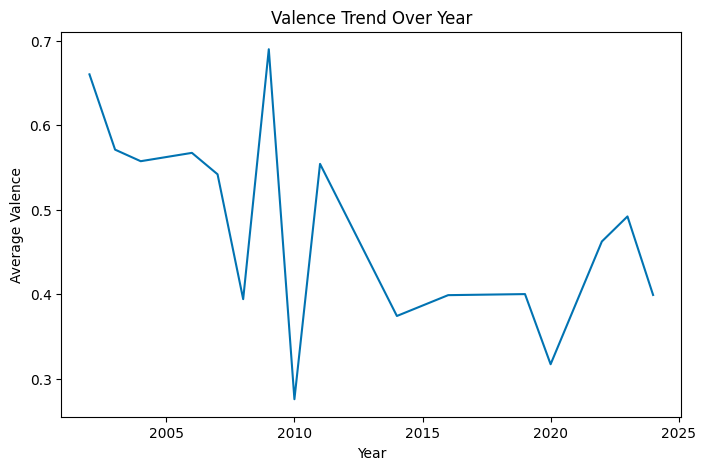

In [ ]:
#calculate valence mean
valence_trend=df.groupby('year')['valence'].mean().reset_index()

#plot
plt.figure(figsize=(8,5))
sns.lineplot(x='year',y='valence',data=valence_trend)
plt.title('Valence Trend Over Year')
plt.xlabel('Year')
plt.ylabel('Average Valence')
plt.show()

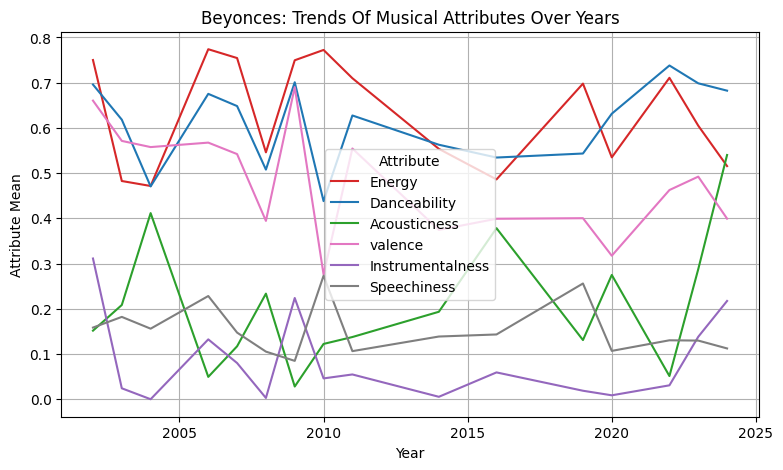

In [ ]:
#group the data by yearly and calculate the mean of the numerical values
yearly_means=df.groupby('year')[['energy',
                                   'danceability',
                                   'acousticness',
                                   'valence',
                                   'instrumentalness',
                                   'speechiness']].mean().reset_index()

#plot
plt.figure(figsize=(9,5))
#energy
sns.lineplot(x='year',y='energy',data=yearly_means,label='Energy',color='tab:red')
#danceability
sns.lineplot(x='year',y='danceability',data=yearly_means,label='Danceability',color='tab:Blue')
#acousticness
sns.lineplot(x='year',y='acousticness',data=yearly_means,label='Acousticness',color='tab:Green')
#valence
sns.lineplot(x='year',y='valence',data=yearly_means,label='valence',color='tab:pink')
#instrumentalness
sns.lineplot(x='year',y='instrumentalness',data=yearly_means,label='Instrumentalness',color='tab:purple')
#speechiness
sns.lineplot(x='year',y='speechiness',data=yearly_means,label='Speechiness',color='tab:grey')

plt.title('Beyonces: Trends Of Musical Attributes Over Years')
plt.xlabel('Year')
plt.ylabel('Attribute Mean')
plt.legend(title='Attribute')
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

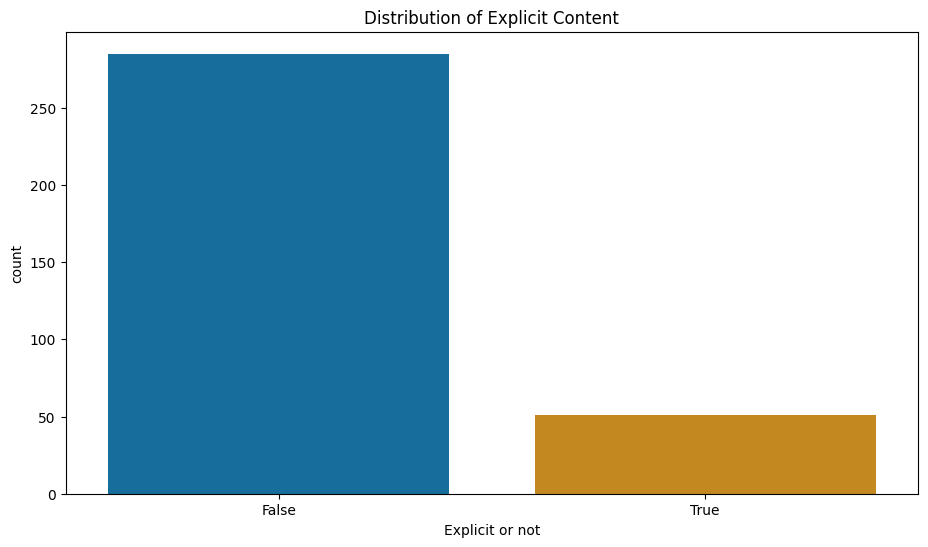

In [ ]:
#count plot for explicit content
plt.figure(figsize=(11,6))
sns.countplot(x='is_explicit',data=df,palette='colorblind')

plt.title('Distribution of Explicit Content')
plt.xlabel('Explicit or not')
plt.show

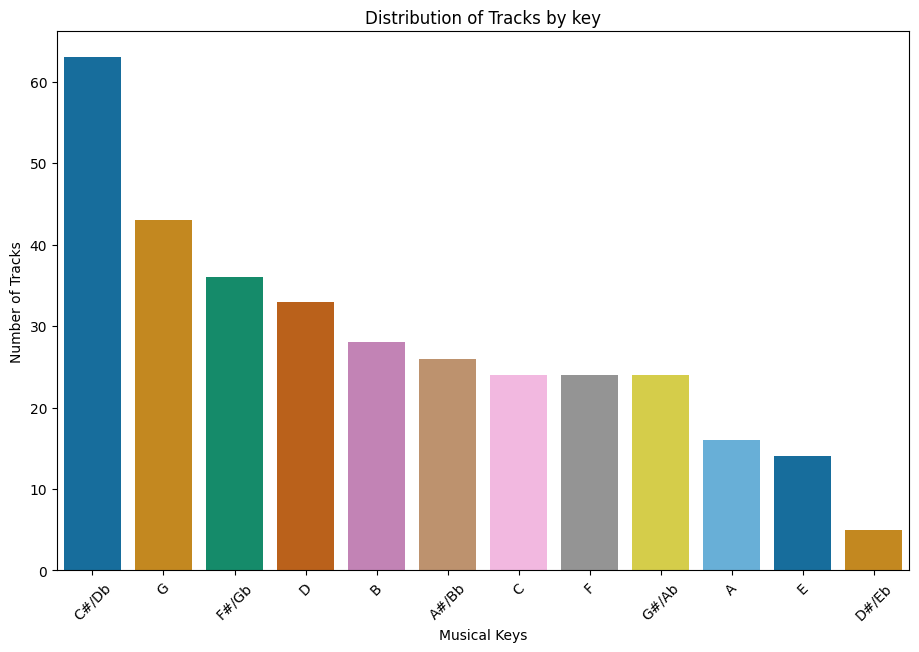

In [ ]:
#Mapping of numerical keys to alphabetical order
key_mapping={
    0: 'C',
    1: 'C#/Db',
    2: 'D',
    3: 'D#/Eb',
    4: 'E',
    5: 'F',
    6: 'F#/Gb',
    7: 'G',
    8: 'G#/Ab',
    9: 'A',
    10: 'A#/Bb',
    11: 'B'}

#create key name varible
df['key_name']=df['key'].map(key_mapping)

#caluculate frequencies of each keys
key_name_frequencies=df['key_name'].value_counts().index

#plot
plt.figure(figsize=(11,7))
sns.countplot(x='key_name',data=df,palette='colorblind',order=key_name_frequencies)
plt.title("Distribution of Tracks by key")
plt.xlabel('Musical Keys')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

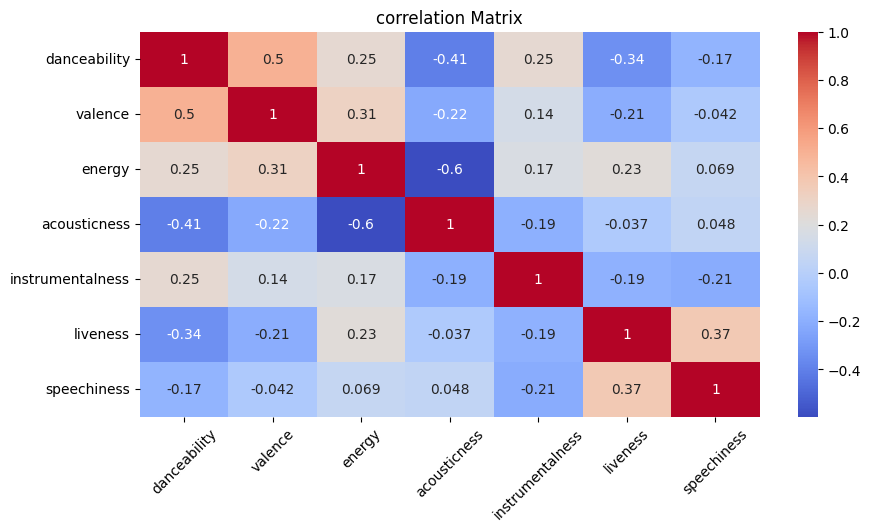

In [ ]:
#Extract track attributes
attributes = ['danceability', 'valence', 'energy', 'acousticness',
            'instrumentalness', 'liveness', 'speechiness']


#correlation Matrix
corr_matrix=df[attributes].corr()


#plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('correlation Matrix')
plt.show()

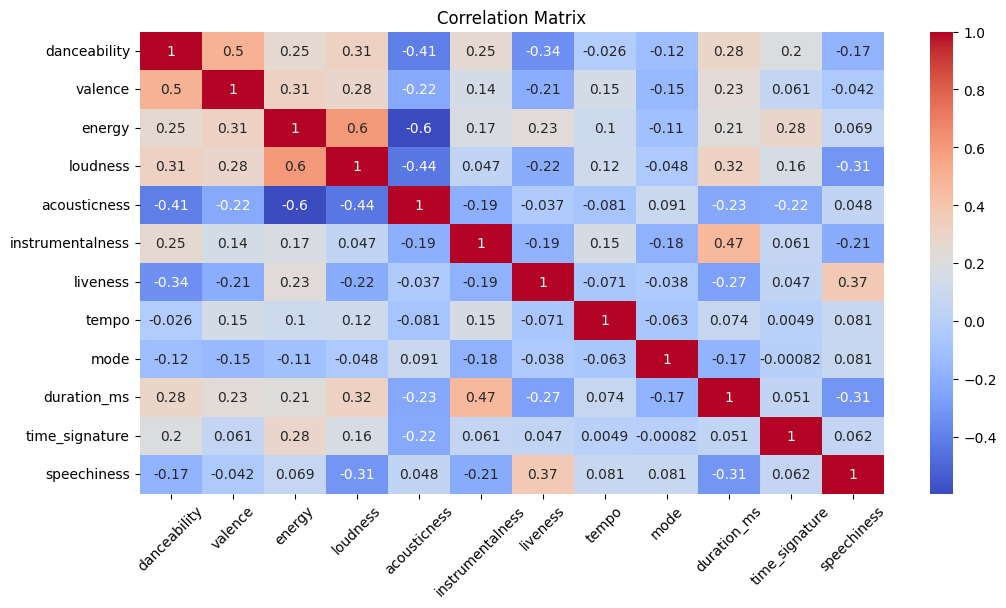

In [ ]:
corr_matrix2=df[num_cols].corr()

#plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()

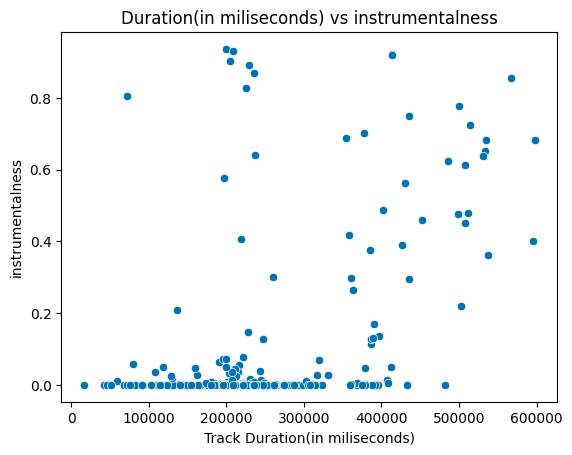

In [ ]:
#relationship b/w danceability and valence
sns.scatterplot(x='duration_ms',y='instrumentalness',data=df)
plt.title('Duration(in miliseconds) vs instrumentalness')
plt.xlabel('Track Duration(in miliseconds)')
plt.show()

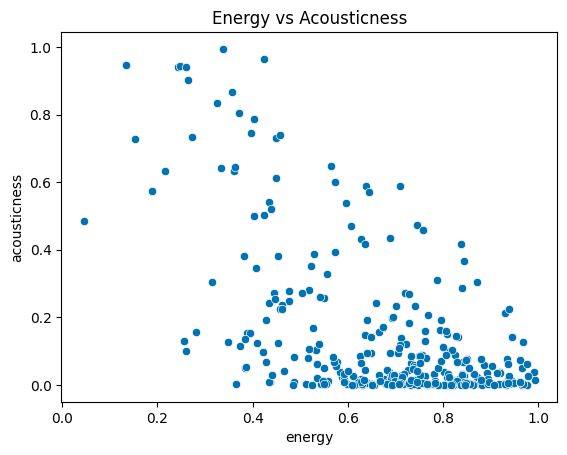

In [ ]:
#relationship b/w energy and acousticness
sns.scatterplot(x='energy',y='acousticness',data=df)
plt.title("Energy vs Acousticness")
plt.show()


In [ ]:
# Calculate the mean of the selected attributes for all tracks
attributes = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
mean_attributes = df[attributes].mean()

# Extract the same attributes for the latest track
df['track_name'] = df['track_name'].str.strip()
specific_track_attributes = df[df['track_name'] == "TEXAS HOLD 'EM"][attributes].iloc[0]

# Convert series to list for plotting
means_values_all = mean_attributes.tolist()
specific_track_values = specific_track_attributes.tolist()

# Define colors for visual distinction
color_mean = '#1f77b4'
color_specific_track = '#ff7f0e'

# Create the radar chart
fig = go.Figure()

# Add trace for the mean attributes of all tracks
fig.add_trace(go.Scatterpolar(
    r=means_values_all,
    theta=attributes,
    fill='toself',
    name='Mean Attributes',
    fillcolor=color_mean,
    line=dict(color=color_mean),
    opacity=0.7
))

# Add trace for the "16 Carriage" track attributes
fig.add_trace(go.Scatterpolar(
    r=specific_track_values,
    theta=attributes,
    fill='toself',
    name='"TEXAS HOLD EM" Attributes',
    fillcolor=color_specific_track,
    line=dict(color=color_specific_track, dash='dot'),
    opacity=0.8
))

# Fine-tuning the layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    title={
        'text': 'Comparison of Mean Track Attributes vs "TEXAS HOLD EM"',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    showlegend=True
)

fig.show()


In [ ]:

num_cols = ['danceability', 'energy', 'acousticness', 'valence', 'speechiness', 'instrumentalness']
# Grouping by 'album_name' and calculating mean for numerical attributes
album_means = df.groupby('album_name')[num_cols].mean().reset_index()
# Display the DataFrame
album_means[['album_name', 'danceability', 'energy', 'acousticness', 'valence', 'speechiness', 'instrumentalness']]

,album_name,danceability,energy,acousticness,valence,speechiness,instrumentalness
0,16 CARRIAGES,0.525000,0.453000,0.382000,0.382000,0.063400,0.000000
1,4,0.604286,0.701429,0.175597,0.526143,0.120314,0.000444
2,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),0.784000,0.700000,0.011200,0.204000,0.039600,0.000018
3,Above And Beyoncé Dance Mixes,0.715000,0.724625,0.031791,0.618788,0.099400,0.272532
4,At Last,0.242000,0.438000,0.519000,0.559000,0.069400,0.005230
5,B'Day,0.653455,0.694182,0.112998,0.547727,0.261627,0.000922
6,B'Day Deluxe Edition,0.619174,0.701739,0.151380,0.501739,0.180030,0.000383
7,BEYONCÉ [Platinum Edition],0.562700,0.553550,0.193354,0.374385,0.138630,0.005367
8,BREAK MY SOUL REMIXES,0.771500,0.890250,0.004229,0.594000,0.098700,0.139407
9,Beautiful Liar,0.726250,0.697000,0.030769,0.495250,0.074675,0.234937


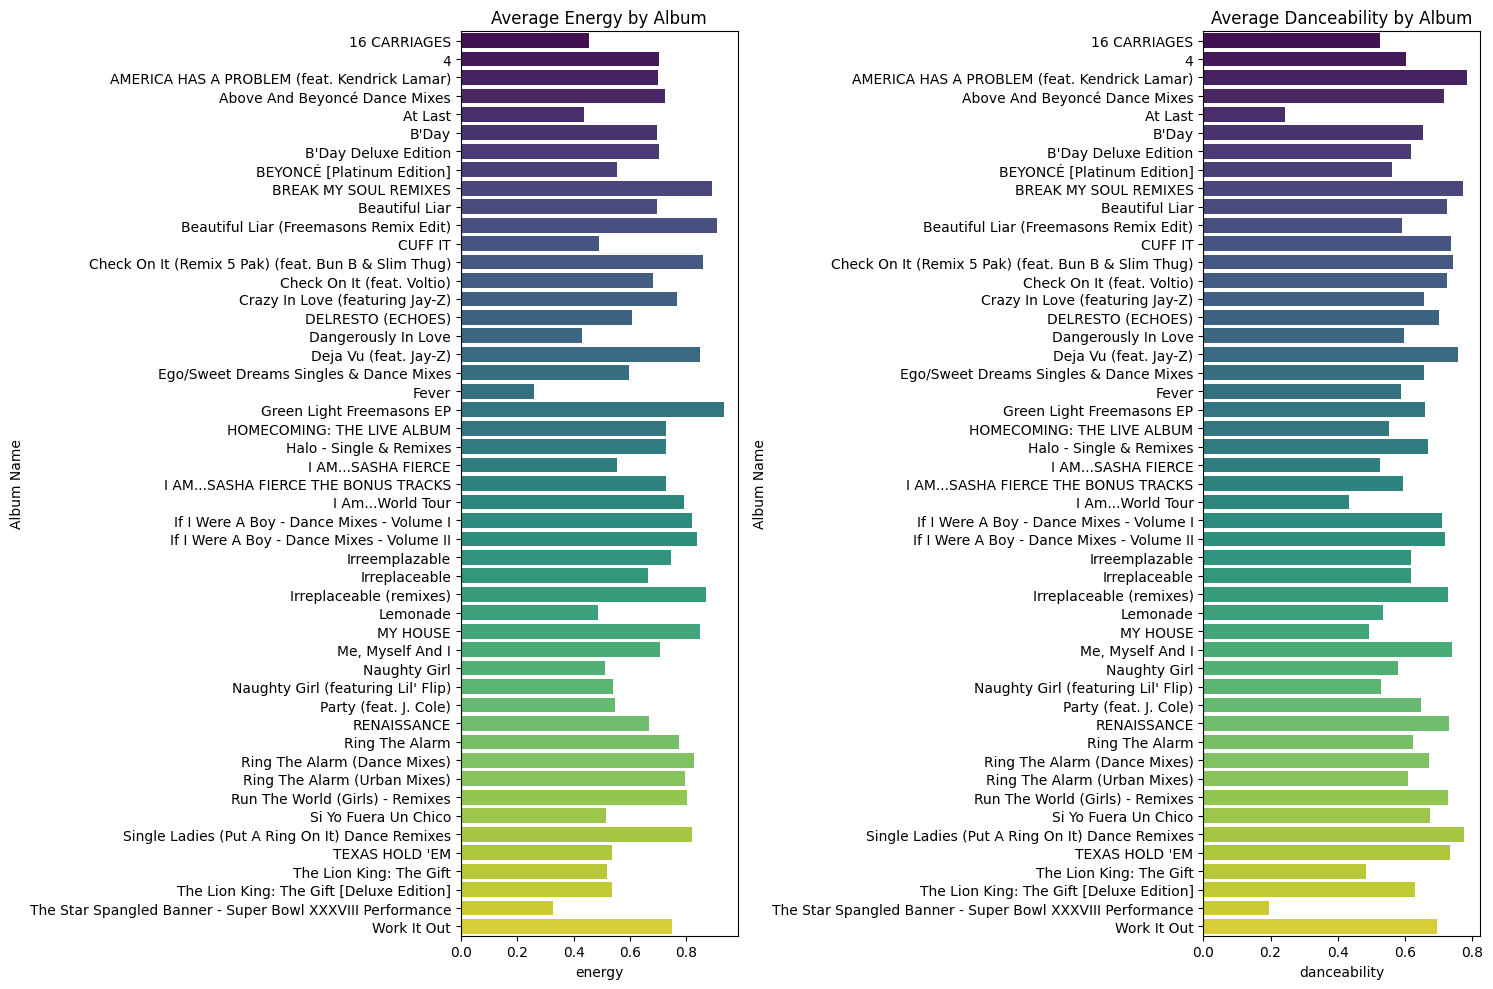

In [ ]:
#set the figure size for better readability
plt.figure(figsize=(15,10))

#subplot 1: Energy
plt.subplot(1,2,1) #1 row, 2 colns, 1st subplot
sns.barplot(x='energy',y='album_name',data=album_means,palette='viridis')
plt.title('Average Energy by Album')
plt.ylabel('Album Name')
#subplot 2: Danceability
plt.subplot(1,2,2) #1 row, 2 colns, 2nd subplot
sns.barplot(x='danceability',y='album_name',data=album_means,palette='viridis')
plt.title('Average Danceability by Album')
plt.ylabel('Album Name')

plt.tight_layout()
plt.show()

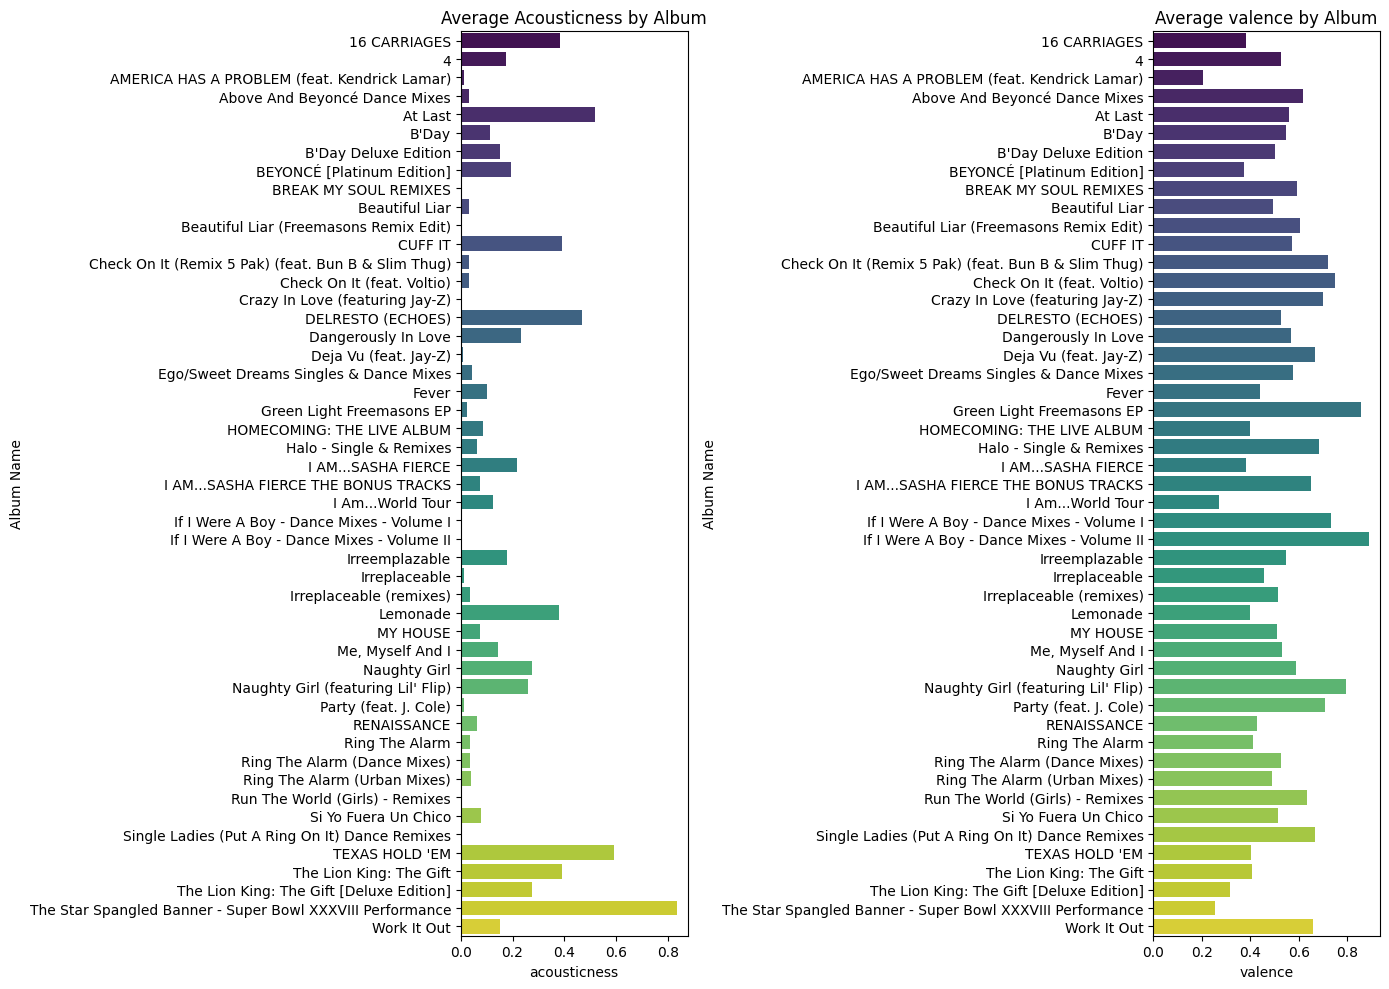

In [ ]:
#set the fig size for better readability
plt.figure(figsize=(14,10))

#subplot 1: Acousticness
plt.subplot(1,2,1) #1 row, 2 colns, 1st sub plot
sns.barplot(x='acousticness',y='album_name',data=album_means,palette='viridis')
plt.title('Average Acousticness by Album')
plt.ylabel('Album Name')

#subplot 2: valence
plt.subplot(1,2,2) #1 row, 2 colns, 2nd subplot
sns.barplot(x='valence',y='album_name',data=album_means,palette='viridis')
plt.title('Average valence by Album')
plt.ylabel('Album Name')

plt.tight_layout()
plt.show()

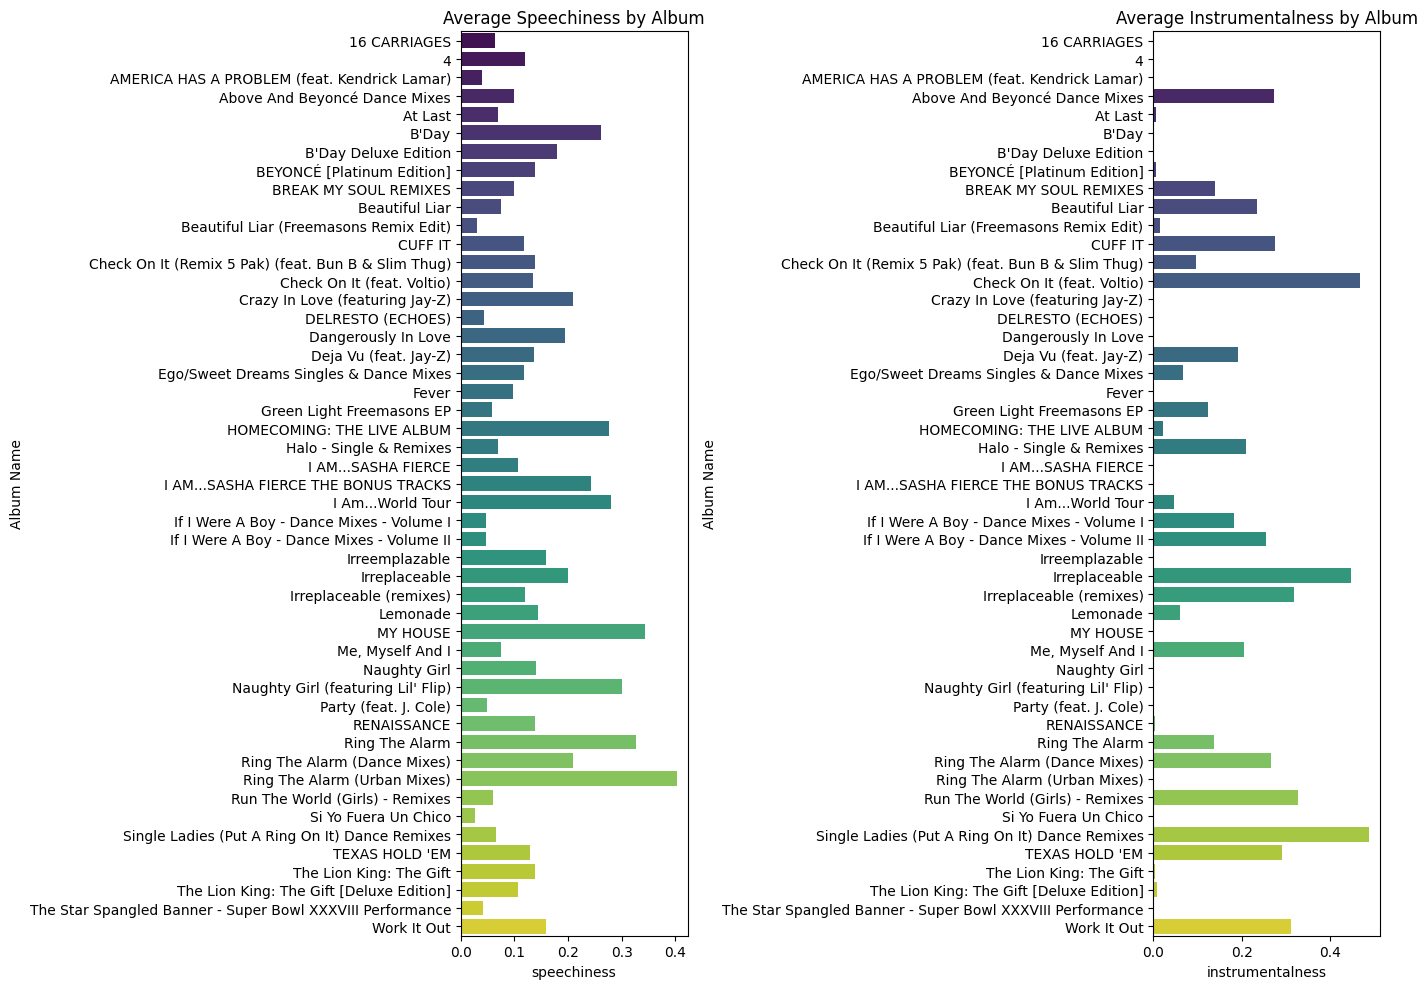

In [ ]:
#set the figsize for better readability
plt.figure(figsize=(14,10))
#subplot 1: Speechiness
plt.subplot(1,2,1)
sns.barplot(x='speechiness',y='album_name',data=album_means,palette='viridis')
plt.title('Average Speechiness by Album')
plt.ylabel('Album Name')

#subplot 2: Instrumentalness
plt.subplot(1,2,2)
sns.barplot(x='instrumentalness',y='album_name',data=album_means,palette='viridis')
plt.title('Average Instrumentalness by Album')
plt.ylabel('Album Name')

plt.tight_layout()
plt.show()

In [ ]:
#visualize tempo by album
tempo_duration=['tempo','duration_ms']
#calculating mean tempo and duration for each album
album_tempo_duration=df.groupby('album_name')[tempo_duration].mean().reset_index()
#set the dataframe by 'tempo' in descending order
album_tempo_sorted=album_tempo_duration.sort_values('tempo', ascending=False)

In [ ]:
#Add std to the Dataframe
#calculate standard deviation for 'tempo' and 'duration_ms' within each album
album_tempo_duration_std=df.groupby('album_name')[tempo_duration].std().reset_index()

#rename columns for clarity
album_tempo_duration_std.rename(columns={'tempo':'tempo_std','duration_ms':'duration_ms_std'},inplace=True)

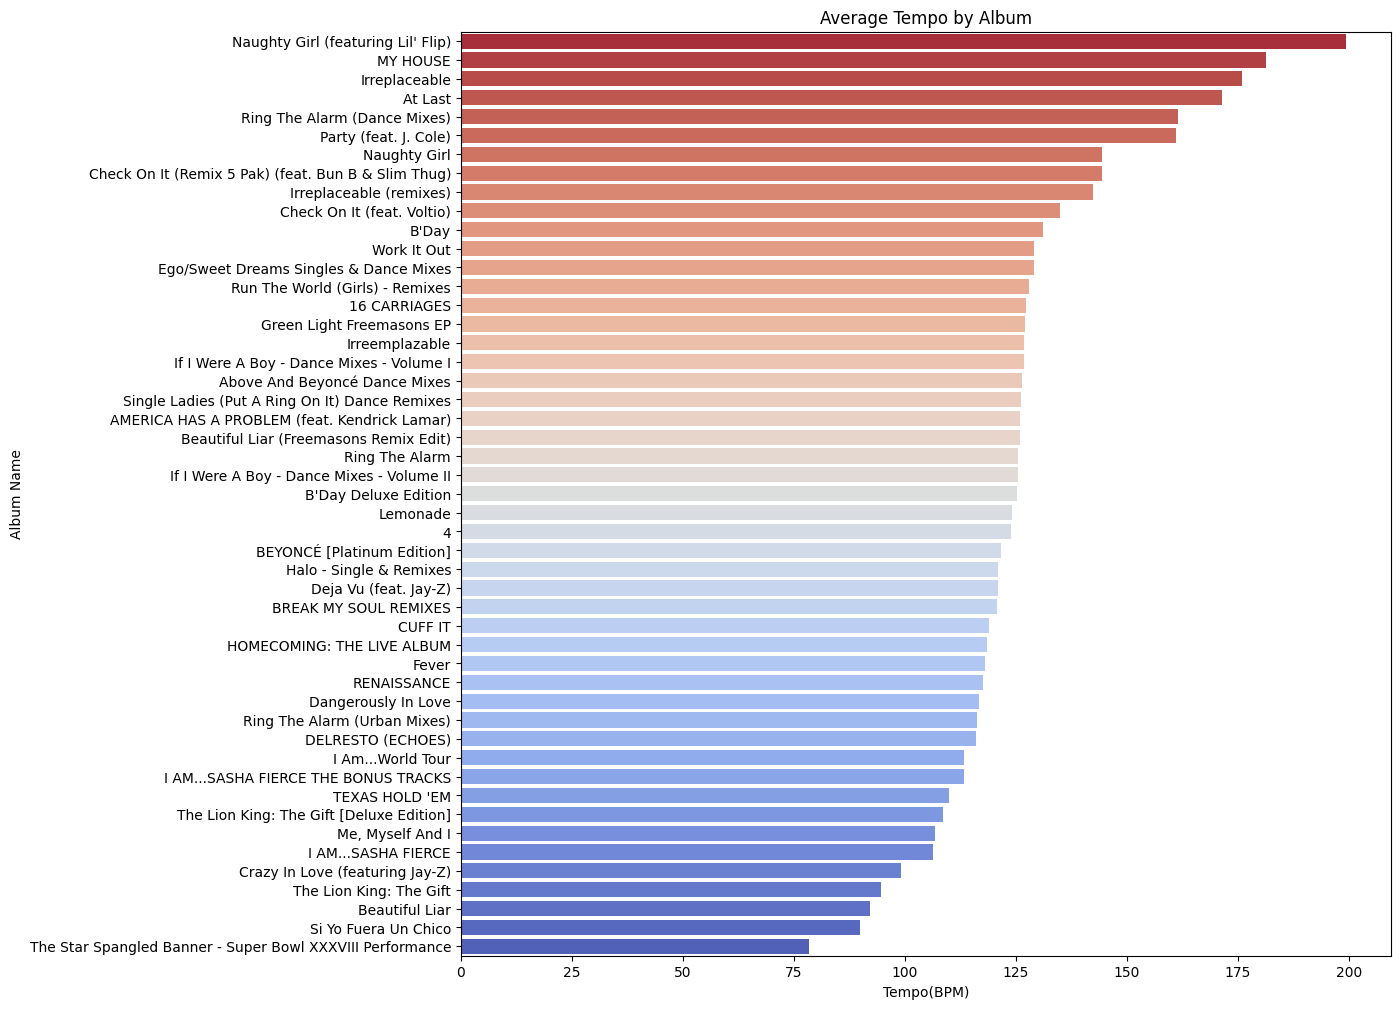

In [ ]:
#plot
plt.figure(figsize=(12,12))
sns.barplot(x='tempo',y='album_name', data=album_tempo_sorted,palette='coolwarm_r')
plt.title('Average Tempo by Album')
plt.xlabel('Tempo(BPM)')
plt.ylabel('Album Name')
plt.show()

In [ ]:
#add std to the Dataframe
#calculate standard deviation for 'tempo' and 'duration_ms' within each album
album_tempo_duration_ms=df.groupby('album_name')[tempo_duration].std().reset_index()

#rename columns for clarity
album_tempo_duration_std.rename(columns={'tempo':'tempo_std','duration_ms':'duration_ms_std'},inplace=True)
print(album_tempo_duration_std)

                                           album_name  tempo_std  \
0                                        16 CARRIAGES        NaN   
1                                                   4  31.063992   
2        AMERICA HAS A PROBLEM (feat. Kendrick Lamar)        NaN   
3                       Above And Beyoncé Dance Mixes  24.105071   
4                                             At Last        NaN   
5                                               B'Day  35.348294   
6                                B'Day Deluxe Edition  36.824529   
7                          BEYONCÉ [Platinum Edition]  28.011313   
8                               BREAK MY SOUL REMIXES   4.372576   
9                                      Beautiful Liar   0.382138   
10             Beautiful Liar (Freemasons Remix Edit)        NaN   
11                                            CUFF IT   4.661571   
12  Check On It (Remix 5 Pak) (feat. Bun B & Slim ...  19.738284   
13                         Check On It (feat. Vo

In [ ]:
#merge the mean and std dfataframes
album_analysis=pd.merge(album_tempo_duration,album_tempo_duration_std,on='album_name')
#display the combined dataframe
print(album_analysis)

                                           album_name       tempo  \
0                                        16 CARRIAGES  127.246000   
1                                                   4  123.973643   
2        AMERICA HAS A PROBLEM (feat. Kendrick Lamar)  126.015000   
3                       Above And Beyoncé Dance Mixes  126.377500   
4                                             At Last  171.357000   
5                                               B'Day  131.113273   
6                                B'Day Deluxe Edition  125.390565   
7                          BEYONCÉ [Platinum Edition]  121.736750   
8                               BREAK MY SOUL REMIXES  120.743000   
9                                      Beautiful Liar   92.224500   
10             Beautiful Liar (Freemasons Remix Edit)  125.984000   
11                                            CUFF IT  119.067667   
12  Check On It (Remix 5 Pak) (feat. Bun B & Slim ...  144.417800   
13                         Check O

In [1]:
# box Plot
plt.figure(figsize=(12,10))
sns.boxplot(x='tempo', y='album_name', data=df, palette='coolwarm_r')
plt.title('Tempo Distribution by Album')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Album Name')
plt.show()

NameError: name 'plt' is not defined

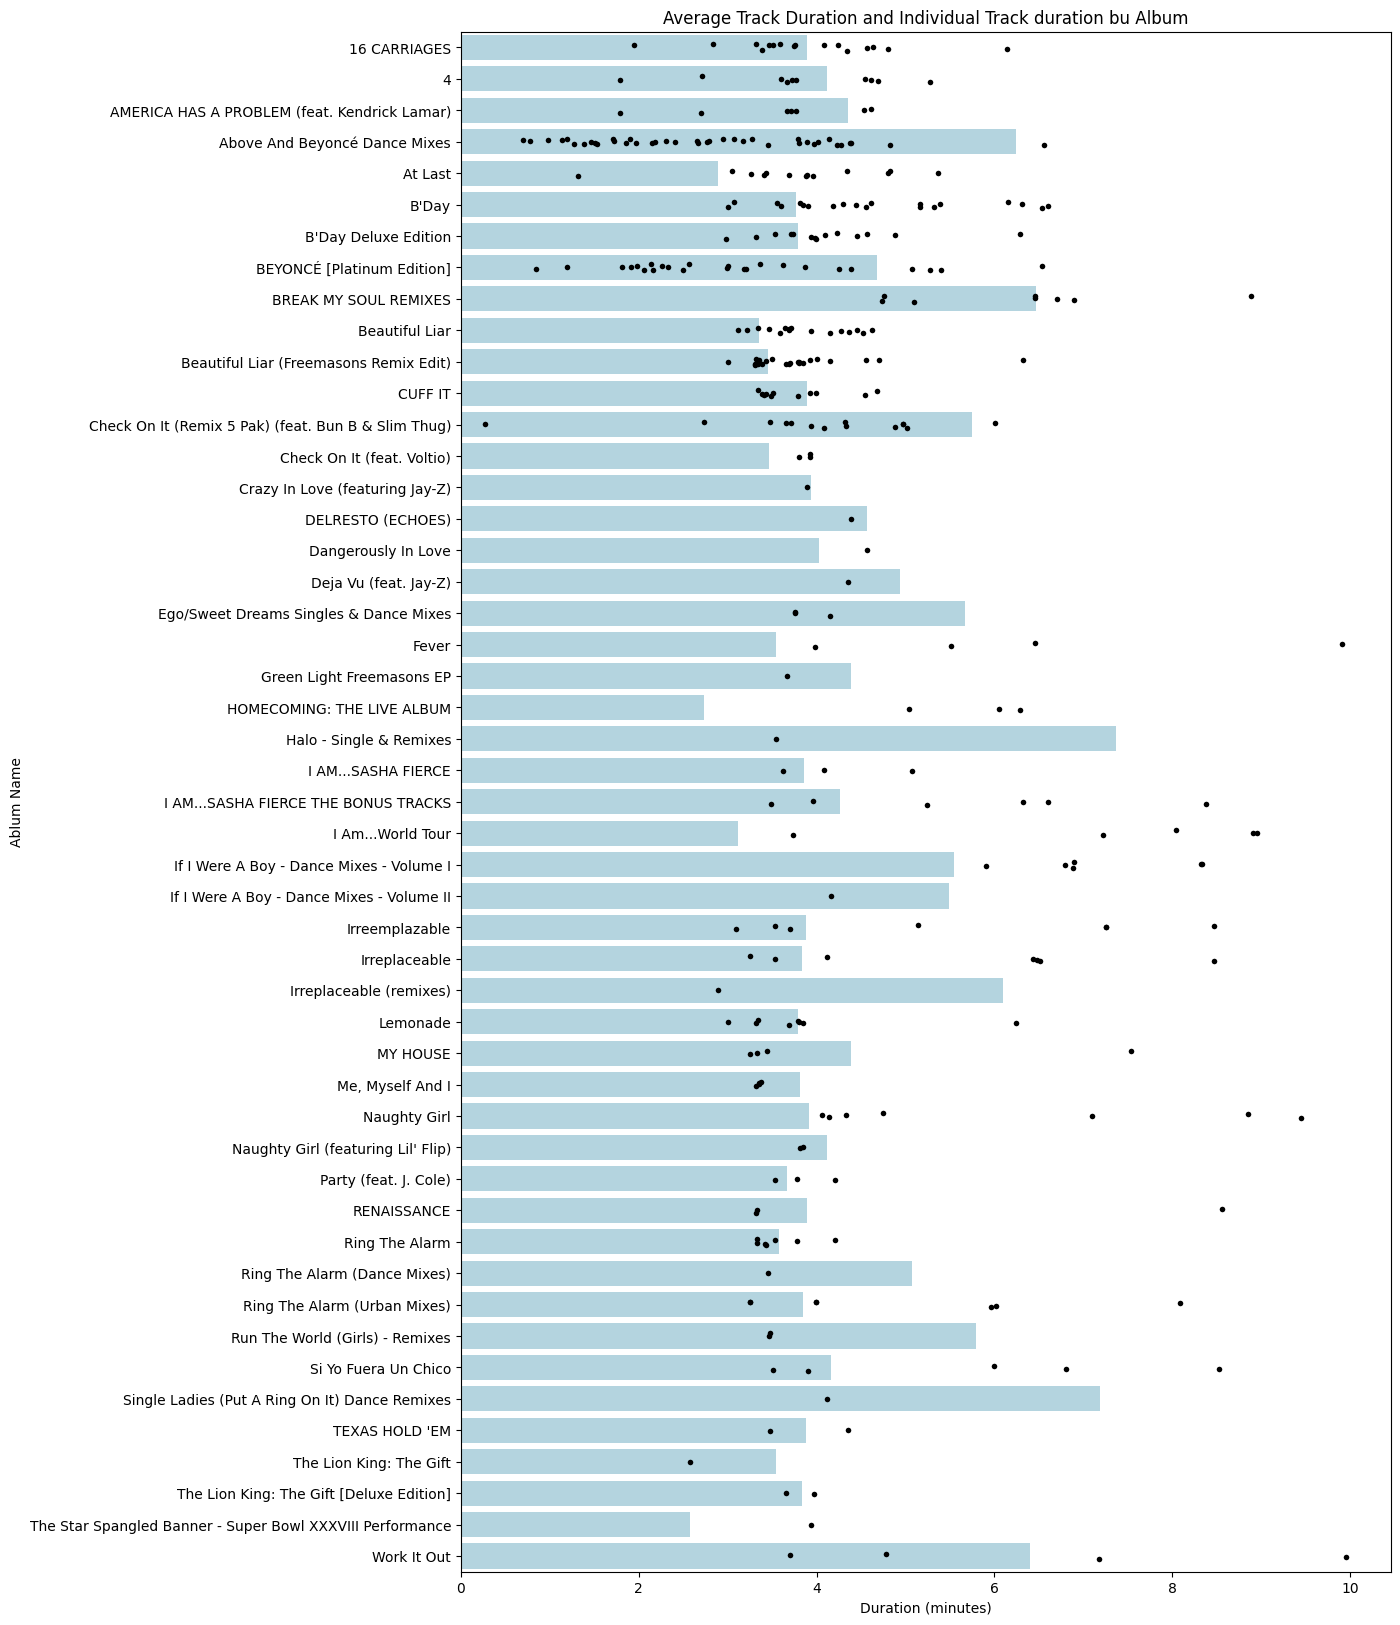

In [ ]:
#overlaying a strip plot on a bar plot
#calculate mean duration in minutes
df['duration_min']=df['duration_ms']/60000
album_duration_mean=df.groupby('album_name')['duration_min'].mean().reset_index()

plt.figure(figsize=(12,20))
sns.barplot(x='duration_min',y='album_name',data=album_duration_mean,color='lightblue',ci=None)
sns.stripplot(x='duration_min',y='album_name',data=df,color='black',size=4,jitter=True)
plt.title('Average Track Duration and Individual Track duration bu Album')
plt.xlabel('Duration (minutes)')
plt.ylabel('Ablum Name')
plt.show()